# 1. Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

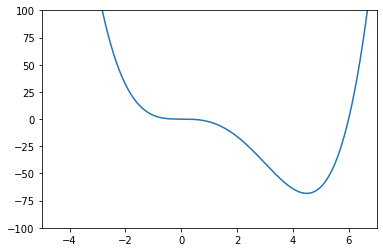

In [2]:
X = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3

def fp(x):
    return 2*x**3-9*x**2
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(X,f(X))
plt.show()

In [3]:
xi = 10
x_old = -10
eps=0.0001
precision=0.00001

In [4]:
while abs(xi-x_old)>precision:
    x_old=xi
    xi=x_old-eps*fp(x_old)

In [5]:
print(xi,f(xi))
print(np.argmin(f(X)))
print(X[1450],f(X[1450])) # 경사하강법으로 구한 함수의 최소값의 위치와 크기, argmin을 통해 구한 최소값의 위치와 크기 비교

4.502449251687811 -68.34362843544105
1450
4.499999999999691 -68.34375


## Result Plot

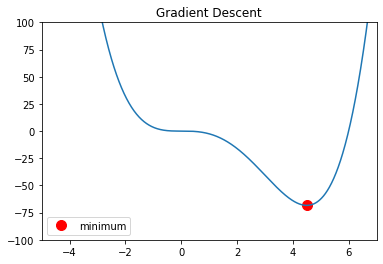

In [6]:
plt.plot(xi,f(xi),'ro',markersize=10,label='minimum') # 최저점
plt.plot(X,f(X))
plt.title("Gradient Descent")
plt.legend(loc=3)
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.show()

# 2. Diabetes (regression)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [8]:
diabetes=datasets.load_diabetes()

## 1. Data

In [9]:
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

Text(0, 0.5, 'target')

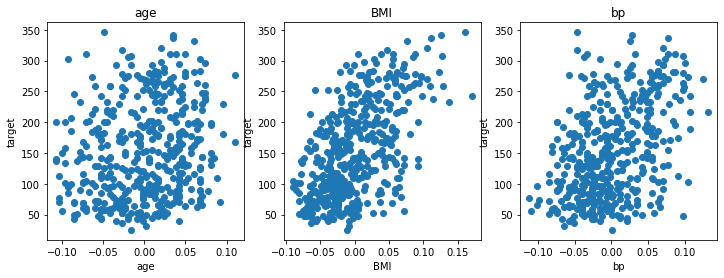

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(X_age,Y,'o')
plt.title('age')
plt.xlabel('age')
plt.ylabel('target')

plt.subplot(132)
plt.plot(X_bmi,Y,'o')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('target')

plt.subplot(133)
plt.plot(X_p,Y,'o')
plt.title('bp')
plt.xlabel('bp')
plt.ylabel('target')

## 2. Model

In [11]:
a1,a2,a3,b1,b2,b3=1,1,1,1,1,1


def g(a,b,xx):
    return a*xx+b



## 3. Loss Function

In [12]:
d=0.01

def mse(a1,b1): # 나이
    y_hat1=g(a1,b1,X_age)
    return np.mean((Y-y_hat1)**2)

def mse2(a2,b2): # BMI
    y_hat2=g(a2,b2,X_bmi)
    return np.mean((Y-y_hat2)**2)

def mse3(a3,b3): # 혈압
    y_hat3=g(a3,b3,X_p)
    return np.mean((Y-y_hat3)**2)

    

## 4. Train

## 4-1 Train with code (Age)

In [13]:
### 나이에 대한 Train
n=0 
while n<100000:
    if mse(a1+d,b1)>mse(a1,b1):
        a1-=d
    else:
        a1+=d
    if mse(a1,b1+d)>mse(a1,b1):
        b1-=d
    else:
        b1+=d
    n+=1

In [14]:
a1,b1 # model의 기울기와 y절편

(304.17999999986836, 152.12000000000663)

## 4-1-1 sklearn Training (Age)

In [15]:
f1=LinearRegression()


In [16]:
X1=X_age.reshape(-1,1)
Y1=Y.reshape(-1,1)
f1.fit(X1,Y1)

LinearRegression()

In [17]:
print(a1,b1)
print(f1.coef_,f1.intercept_) # code로 구한 w와 sklearn으로 구한 w값의 비교 

304.17999999986836 152.12000000000663
[[304.18307453]] [152.13348416]


## 4-2 Train with code(BMI)

In [18]:
### BMI에 대한 Train
n=0 
while n<100000:
    if mse2(a2+d,b2)>mse2(a2,b2):
        a2-=d
    else:
        a2+=d
    if mse2(a2,b2+d)>mse2(a2,b2):
        b2-=d
    else:
        b2+=d
    n+=1

In [19]:
a2,b2 # model의 기울기와 y절편

(949.4399999992816, 152.12000000000663)

## 4-2-1 sklearn Training (BMI)

In [20]:
f2=LinearRegression()

In [21]:
X2=X_bmi.reshape(-1,1)
f2.fit(X2,Y1)


LinearRegression()

In [22]:
print(a2,b2)
print(f2.coef_, f2.intercept_) # code로 구한 w와 sklearn으로 구한 w값의 비교

949.4399999992816 152.12000000000663
[[949.43526038]] [152.13348416]


## 4-3 Train with code(혈압)

In [23]:
### 혈압에 대한 Train
n=0 
while n<100000:
    if mse3(a3+d,b3)>mse3(a3,b3):
        a3-=d
    else:
        a3+=d
    if mse3(a3,b3+d)>mse3(a3,b3):
        b3-=d
    else:
        b3+=d
    n+=1

In [24]:
a3,b3 # model의 기울기와 y절편

(714.739999999495, 152.12000000000663)

## 4-3-1 sklearn Traning(혈압)

In [25]:
f3=LinearRegression()

In [26]:
X3=X_p.reshape(-1,1)
f3.fit(X3,Y1)

LinearRegression()

In [27]:
print(a3,b3) 
print(f3.coef_,f3.intercept_) # code로 구한 w와 sklearn으로 구한 w값의 비교

714.739999999495 152.12000000000663
[[714.7416437]] [152.13348416]


## 5. Result Plot

Text(0, 0.5, 'target')

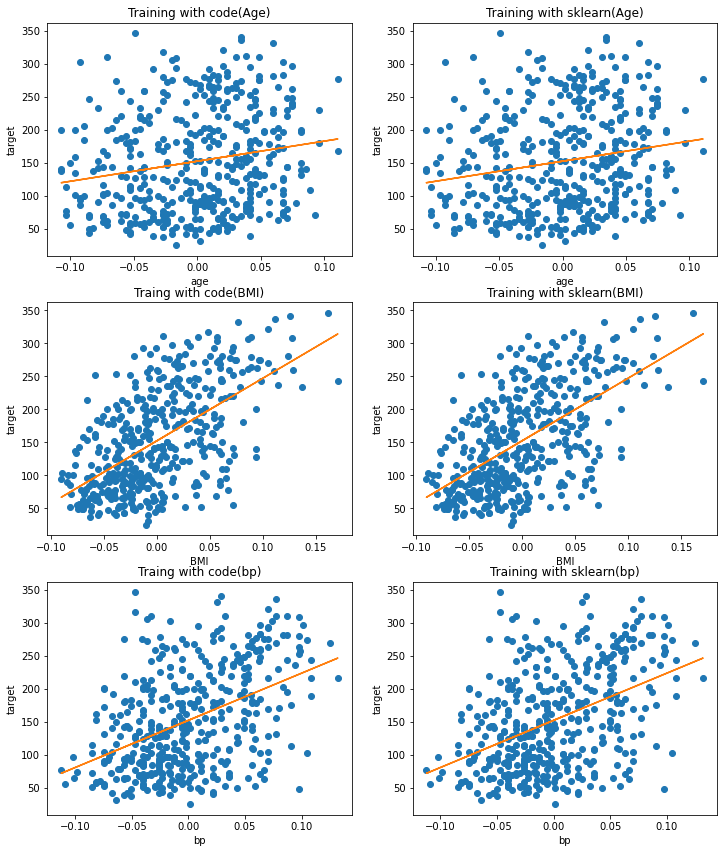

In [28]:
plt.figure(figsize=(12,30))
plt.subplot(621)
plt.plot(X_age,Y,'o')
plt.plot(X_age,g(a1,b1,X_age))
plt.title("Training with code(Age)")
plt.xlabel('age')
plt.ylabel('target')

plt.subplot(622)
plt.plot(X_age,Y,'o')
plt.plot(X1,f1.predict(X1))
plt.title("Training with sklearn(Age)")
plt.xlabel('age')
plt.ylabel('target')

plt.subplot(623)
plt.plot(X_bmi,Y,'o')
plt.plot(X_bmi,g(a2,b2,X_bmi))
plt.title("Traing with code(BMI)")
plt.xlabel('BMI')
plt.ylabel('target')

plt.subplot(624)
plt.plot(X_bmi,Y,'o')
plt.plot(X2,f2.predict(X2))
plt.title("Training with sklearn(BMI)")
plt.xlabel('BMI')
plt.ylabel('target')

plt.subplot(625)
plt.plot(X_p,Y,'o')
plt.plot(X_p,g(a3,b3,X_p))
plt.title("Traing with code(bp)")
plt.xlabel('bp')
plt.ylabel('target')

plt.subplot(626)
plt.plot(X_p,Y,'o')
plt.plot(X_p,f3.predict(X3))
plt.title("Training with sklearn(bp)")
plt.xlabel('bp')
plt.ylabel('target')

